# **Import Data**

A [dataset](https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/) of Spotify songs with 125 different genres and their audio features from Kaggle. Audio features include danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, and tempo.

In [ ]:
from google.colab import drive
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load the raw_data from drive
drive.mount("/content/drive", force_remount=True)
path = '/content/drive/MyDrive/Human_AI_05318/Music_Recommendation/dataset.csv'
df = pd.read_csv(path, low_memory=False) # read the csv file into a pandas dataframe object
df.head()

Mounted at /content/drive


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


# **Data Cleaning**

*   Drop duplicate instances of songs
*   Convert object types to string types for track_id, artists, album_name, track_name, track_genre
*   Drop null records

In [ ]:
# Drop duplicate instances of a song
data = df.drop_duplicates(subset=['track_name', 'artists'])
data = data.drop('Unnamed: 0', axis=1)

In [ ]:
# Convert obj to string types
data['track_id'] = data['track_id'].astype(pd.StringDtype())
data['artists'] = data['artists'].astype(pd.StringDtype())
data['album_name'] = data['album_name'].astype(pd.StringDtype())
data['track_name'] = data['track_name'].astype(pd.StringDtype())
data['track_genre'] = data['track_genre'].astype(pd.StringDtype())
# Convert artist and track name to lowercase
data['artists'] = data['artists'].str.lower()
data['track_name'] = data['track_name'].str.lower()
data.dtypes

track_id             string
artists              string
album_name           string
track_name           string
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          string
dtype: object

In [ ]:
# Drop null data
print(data.isna().sum())
isNull = pd.isnull(data["album_name"])
data[isNull]
data = data.drop(labels=65900, axis=0)

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [ ]:
data.to_csv("/content/drive/MyDrive/Human_AI_05318/Music_Recommendation/all_data.csv", index = False)


# **Data Exploration**

*   Acousticness has a large range as it's interquartile range is the longest
*   Speechiness, instrumentalness, and liveness have a small range, low 75th percentile, and a lot of outliers. Since the range is small, it might not have a great influence or importance in our model
*   Energy and loudness have a high positive correlation
*   Acousticness and energy have a high negative correlation

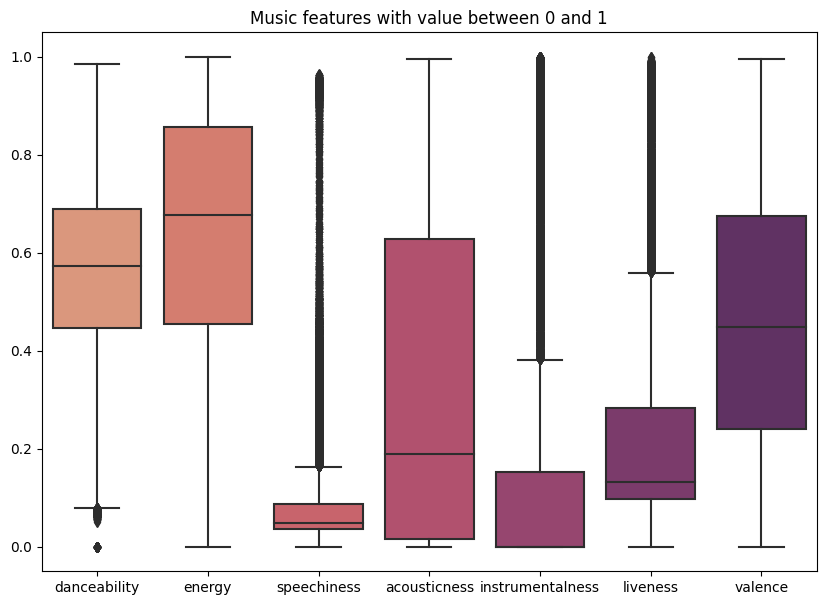

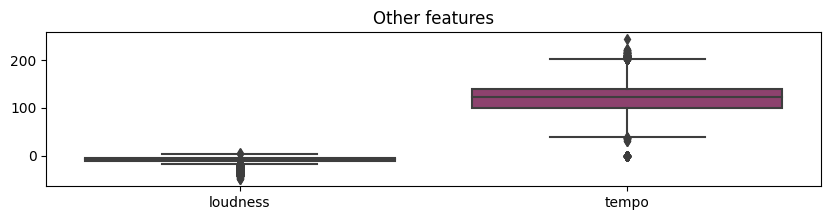

In [ ]:
# Boxplots for music features

# Features with value from 0 to 1
binary_plot = ['danceability', 'energy', 'speechiness',
             'acousticness', 'instrumentalness', 'liveness', 'valence']
plt.figure(figsize=(10, 7))
sns.boxplot(data=data.loc[:, binary_plot], palette='flare')
plt.title('Music features with value between 0 and 1')
plt.show()

# Other music features
other_plot = binary_plot = ['loudness', 'tempo']
plt.figure(figsize=(10, 2))
sns.boxplot(data=data.loc[:, other_plot], palette='flare')
plt.title('Other features')
plt.show()

# Acousticness has a wide dispersed range as it's interquartile range is large
# Speechiness, instrumentalness, and liveness have a small range

<ipython-input-15-add4282f3535>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


                  popularity  duration_ms  explicit  danceability    energy  \
popularity          1.000000    -0.053321  0.063766      0.087245 -0.000871   
duration_ms        -0.053321     1.000000 -0.066693     -0.060165  0.058394   
explicit            0.063766    -0.066693  1.000000      0.110876  0.101717   
danceability        0.087245    -0.060165  0.110876      1.000000  0.134654   
energy             -0.000871     0.058394  0.101717      0.134654  1.000000   
key                 0.004427     0.011665  0.002307      0.032583  0.042777   
loudness            0.090162     0.002400  0.107074      0.264934  0.761042   
mode               -0.004927    -0.035648 -0.028066     -0.059299 -0.069535   
speechiness        -0.064913    -0.063688  0.337448      0.108294  0.139823   
acousticness       -0.032143    -0.106275 -0.083689     -0.167829 -0.731108   
instrumentalness   -0.174509     0.109759 -0.116285     -0.191535 -0.186446   
liveness           -0.028974     0.005601  0.045489 

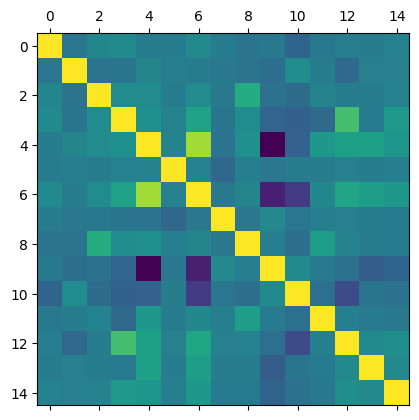

In [ ]:
# Correlation matrix for music features
cor = data.corr()
print(cor)
plt.matshow(cor)
plt.show()
# Energy and loudness have a high positive correlation (0.761042)
# Acousticness and energy have a high negative correlation (-0.731108)

# **Model Training for Song Recommendation System**
For the song recommendation system, we will be using the K-Means Clustering Algorithm. It will group songs together with similar features so that when given one song, we can find songs in the same group that have similar music features. We will only focus on numerical variables.

### **What is K-Means**

K-Means is an unsupervised machine learning algorithm that groups the data into clusters. The goal is to group the data such that data in each subgroup is similar to each other but the subgroups among themselves are different from each other. As the name suggests, the algorithm creates "k" clusters, finds the cluster center, and groups the data such that the sum of squared distances between each data point and the nearest center is minimized. Sum-of-squared error (SSE) measures how close the data points are to their cluster center, which we will use to determine how well the data fits into their assigned subgroups.

In [ ]:
# Create training data set
X = data.drop(['track_id', 'track_genre', 'album_name','track_name', 'explicit', 'artists', 'mode', 'key',  'time_signature', 'duration_ms', 'popularity', 'energy'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

### **Determining "K"**
We will use the elbow method to determine k. This calculates the Within-Cluster-Sum of Squared Errors (WCSS) for different values of k. We choose the value of k right as WCSS begins to decrease, which looks like an elbow when plotted. WCSS is the sum of squared errors which calculates how close the data points are to their cluster center. This measures how well the data fits into their assigned subgroups which in turn helps us determine the optimal k.


Plotting the elbow curve illustrates that 8 is the best value for k.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

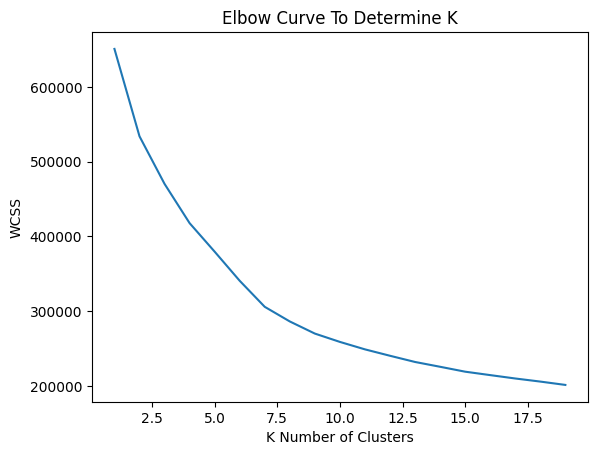

In [ ]:
# Choose K using elbow method
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(X)
    sse.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot([i+1 for i in range(len(sse))], [sse[i] for i in range(len(sse))])
plt.xlabel("K Number of Clusters")
plt.ylabel("WCSS")
plt.title('Elbow Curve To Determine K')
plt.show()

In [ ]:
# Creating the model
model = KMeans(
    n_clusters=8, init='random',
    n_init=10, max_iter=300,
    tol=1e-04, random_state=0,
)
y_pred = model.fit_predict(X)

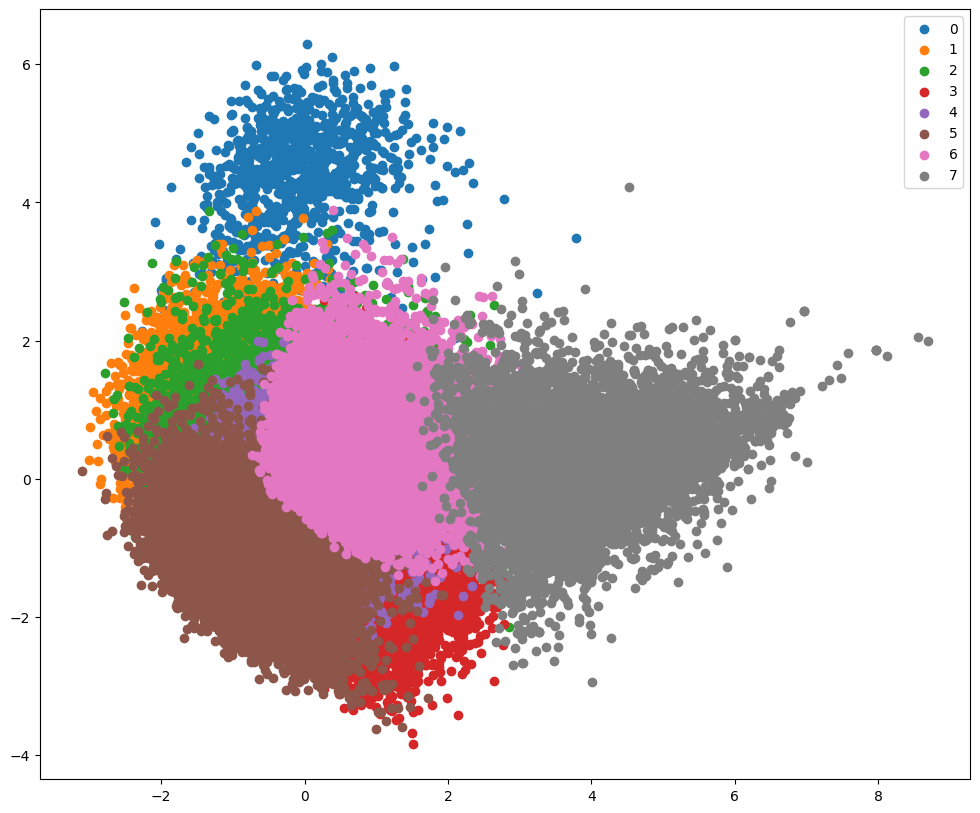

In [ ]:
# Visualize clusters with PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

components = pd.DataFrame(X_transformed)
components['label'] = y_pred

unique = np.unique(y_pred)

plt.figure(figsize=(12,10))
for i in unique:
    plt.scatter(components[components['label'] == i].iloc[:, 0], components[components['label'] == i].iloc[:, 1], label=i)
plt.legend()
plt.show()

# **Using the Song Recommendation System**
To use the song recommendation system, we create a playlist and apply our k-means model.

In [ ]:
# Gets song record given playlist of song title and artist names
def get_songs(playlist, df):
  songs = pd.DataFrame()
  for song_title, artist in playlist:
    song_title = song_title.lower()
    artist = artist.lower()
    song = df.loc[(df['track_name'] == song_title) & (df['artists'] == artist)]
    if song.empty:
      print("Could not find " + song_title + " by " + artist + " in dataset")
    else:
      songs = songs._append(song, ignore_index = True)
  return pd.DataFrame(songs, columns =df.columns)

In [ ]:
# Cleans data to only exclude categorical variables
def get_relevant_cols(d):
  return d.drop(['track_id', 'track_genre', 'album_name','track_name', 'explicit', 'artists', 'mode', 'key',  'time_signature', 'duration_ms', 'popularity', 'energy'], axis=1)

In [ ]:
# Create playlist, 2D array of songs with title and artist
playlist = [['beside you', 'Keshi'],
            ['first class', 'jack harlow'],
            ['heat waves', 'glass animals'],
            ['paris', 'the chainsmokers'],
            ['limbo', 'Keshi'],
             ["IF I DON'T TEXT YOU FIRST", 'Tiffany Day'],
             ['I Like Me Better', 'Lauv'],
             ['my type', 'brb.'],
             ['ANGOSTURA', 'Keshi'],
             ['Not Angry', 'Chris James'],
             ['Charmer', 'Stray Kids'],
             ['After Hours', 'The Weeknd'],
             ['Mmmh', 'Kai'],
             ['ELEVEN', 'IVE'],
             ['DNA', 'BTS'],
            ]

# Describe features
user_songs = get_songs(playlist, data)
user_songs = get_relevant_cols(user_songs)
user_songs.describe()

,danceability,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,15.000000,15.000000,15.000000,15.000000,1.500000e+01,15.000000,15.000000,15.000000
mean,0.714733,-6.931333,0.075320,0.285273,9.649753e-04,0.121707,0.481407,114.761067
std,0.105126,2.833763,0.055053,0.264912,2.677296e-03,0.061067,0.256022,23.638744
min,0.536000,-12.418000,0.030400,0.021500,0.000000e+00,0.048000,0.084100,80.870000
25%,0.652000,-8.160500,0.049500,0.057050,5.050000e-07,0.094800,0.258000,95.980000
50%,0.711000,-6.428000,0.054300,0.202000,6.700000e-06,0.107000,0.531000,108.953000
75%,0.773500,-5.774000,0.088400,0.449500,1.443000e-04,0.129000,0.687500,129.870000
max,0.905000,-2.508000,0.253000,0.879000,9.910000e-03,0.305000,0.852000,170.035000


In [ ]:
'''
  -param[in] predictions: model prediction for user playlist
  -param[in] top_n: number of cluster classes

  -param[out] cluster_num: minimum between top_n and unique values
  -param[out] freq_clusters: clusters sorted by increasing freq
  -param[out] freq_percent: percentage that each cluster should be used in the recommendation
'''
def get_freq_clusters(predictions, top_n):
    unique_vals, freq = np.unique(predictions, return_counts=True)
    cluster_num = min(unique_vals.shape[0], top_n)
    sorted_i = np.argsort(freq)[::-1]
    sorted_freq = freq[sorted_i]
    freq_sum = np.sum(sorted_freq[:cluster_num])
    freq_clusters = unique_vals[sorted_i]
    freq_percent = [(i / freq_sum) for i in sorted_freq[:cluster_num]]
    return cluster_num, freq_clusters, freq_percent

In [ ]:
'''
  -param[in] playlist: user playlist, list of track_id
  -param[in] song_data: dataset with all songs
  -param[in] scaler: fitted scaler
  -param[in] model: k-cluster model
  -param[in] rec_count_max: number of song recommendations
  -param[in] top_n: number of cluster classes

  -param[out] song_recs: song recommendations
'''
def get_recommendations(model, song_data, playlist, scaler, rec_count_max=5, top_n=3):
    # Transform and predict
    playlist = get_songs(playlist, song_data)
    songs = playlist['track_id'].values.tolist()

    X = get_relevant_cols(playlist)
    X = scaler.fit_transform(X)
    predictions = model.predict(X)

    data = get_relevant_cols(song_data)
    data = scaler.transform(data)

    song_recs = pd.DataFrame(columns=['track_id', 'similarity'])
    # Get most frequent cluster classes from user input
    cluster_num, freq_clusters, freq_perc = get_freq_clusters(predictions, top_n)
    for i in range(cluster_num):
        # Number of recommendations from given cluster
        rec_count = round(freq_perc[i] * rec_count_max)
        cur_cluster_number = freq_clusters[i]

        # Create mean vector and calculate similarity
        pos = np.where(predictions == cur_cluster_number)[0]
        cluster_songs = X[pos, :]
        mean_song = np.mean(cluster_songs, axis=0)
        similarity = cdist(np.reshape(mean_song, (1,-1)), data)

        # Sort to get similar songs
        similarity_s = pd.Series(similarity.flatten(), name='similarity')
        similar_songs = pd.concat([song_data['track_id'].reset_index(drop=True), similarity_s.reset_index(drop=True)], axis=1)

        # Remove songs from user_songs list
        similar_songs = similar_songs[~(similar_songs['track_id'].isin(songs))]
        similar_songs = similar_songs.sort_values(by='similarity', ascending=True).reset_index(drop=True)

        song_recs = song_recs._append(similar_songs)

    song_recs = song_recs.reset_index(drop=True)
    return song_recs.loc[:rec_count_max-1]

In [ ]:
model_result = get_recommendations(model, data, playlist, scaler)
song_ids = list(model_result['track_id'])
song_recs = data[data['track_id'].isin(song_ids)]
song_recs

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1859,5gXeGIJCGNycRlkoBIpBeJ,j prince,Om3ga: Krng the Mixtape,must reach,17,184800,False,0.808,0.778,6,-4.791,1,0.0807,0.1980,0.000000,0.1010,0.613,100.009,4,afrobeat
14792,02O8kFegag7ROAOh86yCuv,kinderen voor kinderen,38 - Gruwelijk eng,hollandse pot 2.0,29,206186,False,0.762,0.887,2,-5.103,1,0.0691,0.0908,0.000007,0.1030,0.655,99.992,4,children
68754,4ZVixZtN0pa9cXednIjrSI,justin quiles;dalex;konshens,Real,real,45,227477,False,0.754,0.827,7,-4.613,1,0.0702,0.0689,0.000005,0.0949,0.670,111.957,4,latino
74450,41YjHftSeJzXPHDPeddhiJ,ivete sangalo;mc livinho,Cheguei Pra Te Amar,cheguei pra te amar,43,197493,False,0.769,0.802,10,-5.601,0,0.0617,0.1540,0.000012,0.0731,0.696,101.893,4,mpb
94197,4d16JADh71pTeqx0vlHL69,killbunk,Chanel Bag,chanel bag,67,158667,True,0.770,0.614,11,-5.490,0,0.0816,0.0671,0.000000,0.0873,0.698,115.012,4,sad


In [ ]:
import pickle
pickle.dump(model, open('/content/drive/MyDrive/Human_AI_05318/Music_Recommendation/model.pkl', 'wb'))

In [ ]:
pModel = pickle.load(open('/content/drive/MyDrive/Human_AI_05318/Music_Recommendation/model.pkl', 'rb'))
model_result = get_recommendations(pModel, data, playlist, scaler)
song_ids = list(model_result['track_id'])
song_recs = data[data['track_id'].isin(song_ids)]
song_recs

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1859,5gXeGIJCGNycRlkoBIpBeJ,j prince,Om3ga: Krng the Mixtape,must reach,17,184800,False,0.808,0.778,6,-4.791,1,0.0807,0.1980,0.000000,0.1010,0.613,100.009,4,afrobeat
14792,02O8kFegag7ROAOh86yCuv,kinderen voor kinderen,38 - Gruwelijk eng,hollandse pot 2.0,29,206186,False,0.762,0.887,2,-5.103,1,0.0691,0.0908,0.000007,0.1030,0.655,99.992,4,children
68754,4ZVixZtN0pa9cXednIjrSI,justin quiles;dalex;konshens,Real,real,45,227477,False,0.754,0.827,7,-4.613,1,0.0702,0.0689,0.000005,0.0949,0.670,111.957,4,latino
74450,41YjHftSeJzXPHDPeddhiJ,ivete sangalo;mc livinho,Cheguei Pra Te Amar,cheguei pra te amar,43,197493,False,0.769,0.802,10,-5.601,0,0.0617,0.1540,0.000012,0.0731,0.696,101.893,4,mpb
94197,4d16JADh71pTeqx0vlHL69,killbunk,Chanel Bag,chanel bag,67,158667,True,0.770,0.614,11,-5.490,0,0.0816,0.0671,0.000000,0.0873,0.698,115.012,4,sad
